In [102]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import pandas as pd

In [120]:
data_json2 = json.load(open("offnungszeiten-shops.json"))
df2=pd.json_normalize(data_json2)

# migros and coop files
migros=pd.read_csv("migros.csv")
coop=pd.read_csv("coop.csv")
migros.columns

Index(['business_status', 'formatted_address', 'icon', 'icon_background_color',
       'icon_mask_base_uri', 'name', 'photos', 'place_id', 'rating',
       'reference', 'types', 'user_ratings_total', 'geometry.location.lat',
       'geometry.location.lng', 'geometry.viewport.northeast.lat',
       'geometry.viewport.northeast.lng', 'geometry.viewport.southwest.lat',
       'geometry.viewport.southwest.lng', 'opening_hours.open_now',
       'plus_code.compound_code', 'plus_code.global_code',
       'permanently_closed', 'price_level'],
      dtype='object')

In [107]:
shop_df = df2[df2["subcategories"] == "Lebensmittel / Getränke"]

In [108]:
df=pd.read_csv("GeoFeatures_Zurich_provided_by_UrbanDataLabs.csv")
df=df.drop(columns=["noise_street","bldg_foot","bldg_corner"])
#df=df[df["pers_ha"]>=10]
df.head(1)

,x,y,geom,hh_ha,pers_ha,pt_class,pt_dis,station_dis,noise_street,bldg_foot,bldg_corner,bldg_500,net_acc,lat,lng
0,2682762.5,1246387.5,01010000200808000000000040C577444100000080B304...,8,10,1.0,55,1725,45,4204,t,1402050,1043508.0,47.3631,8.53425


In [82]:
#df["lng"]=df['lng'].round(decimals = 4)

In [95]:
df_new = df.groupby(df['lng']).aggregate("first")

In [96]:
df_new.reset_index(inplace=True)

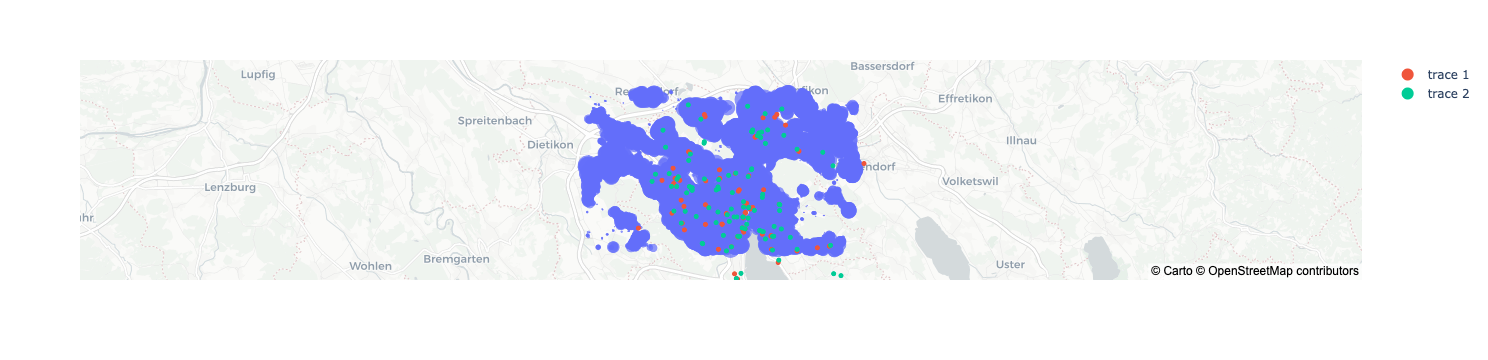

In [122]:
fig = px.scatter_mapbox(df_new, lat="lat", lon="lng",mapbox_style="carto-positron", zoom=10, size="pers_ha") #size="pers_ha", color="bldg_500")
fig.add_scattermapbox(lat=migros["geometry.location.lat"], lon=migros["geometry.location.lng"], mode = 'markers')
fig.add_scattermapbox(lat=coop["geometry.location.lat"], lon=coop["geometry.location.lng"], mode = 'markers')

fig.show()

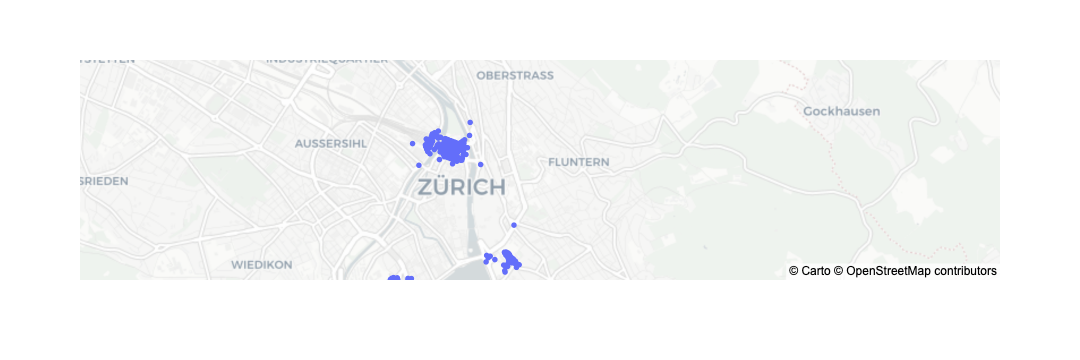

In [40]:
fig = px.scatter_mapbox(df2, lat="geo_point_2d.lat", lon="geo_point_2d.lon",mapbox_style="carto-positron", zoom=10)
fig.show()